Create your own notebook pages.  Use a naming convention such aas: YOURNAME-HW7-linkanalysis-partXXX with your name replacing YOURNAME.

Upload your completed jupyter notebooks to elearning site as your homework submission zip them up in directory  YOURNAME-linkanalysis-fall2017.zip . You should put these notebooks on your github as well.


7.1  Create a crawler using the webcrawler provided and discussed in my jupyter notebook ( https://github.com/pschragger/big-data-python-class/blob/master/Lectures/Lecture_7_-_Link_Analysis.ipynb) , have it crawl the first 200 pages from a base URL of your choosing

7.2  Create a Stochastic matrix from its resulting crawling as per https://cs7083.wordpress.com/2013/01/31/demystifying-the-pagerank-and-hits-algorithms/

7.3 Pass it through the Page Rank algorithm and provide the list of the top 5 page URLs in your sample

7.x For extra credit use the hits algorithm ( with a connectivity matrix )

7.xx For advanced credit find another ranking alogrithm and demonstrate that as well



7.1 Create a crawler using the webcrawler provided and discussed in my jupyter notebook ( https://github.com/pschragger/big-data-python-class/blob/master/Lectures/Lecture_7_-_Link_Analysis.ipynb) , have it crawl the first 200 pages from a base URL of your choosing

We need to create a project first.

In [4]:
%%cmd
scrapy startproject test_insightfulm

Microsoft Windows [Version 10.0.15063]
(c) 2017 Microsoft Corporation. All rights reserved.

(C:\Users\AsusGo\Anaconda2) C:\Users\AsusGo\Desktop\big-data\Homeworks\Link_Homework>scrapy startproject test_insightfulm
New Scrapy project 'test_insightfulm', using template directory 'C:\\Users\\AsusGo\\Anaconda2\\lib\\site-packages\\scrapy\\templates\\project', created in:
    C:\Users\AsusGo\Desktop\big-data\Homeworks\Link_Homework\test_insightfulm

You can start your first spider with:
    cd test_insightfulm
    scrapy genspider example example.com

(C:\Users\AsusGo\Anaconda2) C:\Users\AsusGo\Desktop\big-data\Homeworks\Link_Homework>

then directory named tutorials is created with 
tutorials/
    scrapy.cfg            # deploy configuration file

    tutorials/             # project's Python module, you'll import your code from here
        __init__.py

        items.py          # project items definition file

        pipelines.py      # project pipelines file

        settings.py       # project settings file

        spiders/          # a directory where you'll later put your spiders
            __init__.py

In [5]:
%%cmd
scrapy genspider insightful insightfulmonkeys.blogspot.com

Microsoft Windows [Version 10.0.15063]
(c) 2017 Microsoft Corporation. All rights reserved.

(C:\Users\AsusGo\Anaconda2) C:\Users\AsusGo\Desktop\big-data\Homeworks\Link_Homework>scrapy genspider insightful insightfulmonkeys.blogspot.com
Created spider 'insightful' using template 'basic' 

(C:\Users\AsusGo\Anaconda2) C:\Users\AsusGo\Desktop\big-data\Homeworks\Link_Homework>

In [31]:
%%writefile test_insightfulm/test_insightfulm/spiders/TestInsight1.py
import scrapy
from scrapy.linkextractor import LinkExtractor
from scrapy.spiders import Rule, CrawlSpider
from scrapy.item import Item, Field

class InsightItem(Item):
    url_from = scrapy.Field()
    # The destination URL
    url_to = scrapy.Field()


class TestSpider(CrawlSpider):
    name = "insightful" #identifies the name of the spider
    allowed_domains = ["insightfulmonkeys.blogspot.com"]
    start_urls = ["http://insightfulmonkeys.blogspot.com/2016/08/why-is-sky-black.html"]
    npages = 200

# This mimics getting the pages using the next button. 
    for i in range(2, npages + 2):
        start_urls.append("http://insightfulmonkeys.blogspot.com/2016/08/why-is-sky-black.html"+str(i)+"")
    
    custom_settings = {
    # specifies exported fields and order
    'FEED_EXPORT_FIELDS': ["url_from", "url_to"],
       }

    rules = [
        Rule(
            LinkExtractor(
                canonicalize=True,
                unique=True
            ),
            follow=True,
            callback="parse_items"
        )
    ]
   
    # Method which starts the requests by visiting all URLs specified in start_urls
    def start_requests(self):
        for url in self.start_urls:
            yield scrapy.Request(url, callback=self.parse, dont_filter=True)

    # Method for parsing items
    def parse_items(self, response):
        # The list of items that are found on the particular page
        items = []
        # Only extract canonicalized and unique links (with respect to the current page)
        links = LinkExtractor(canonicalize=True, unique=True).extract_links(response)
        # Now go through all the found links
        for link in links:
            # Check whether the domain of the URL of the link is allowed; so whether it is in one of the allowed domains
            is_allowed = False
            for allowed_domain in self.allowed_domains:
                if allowed_domain in link.url:
                    is_allowed = True
            # If it is allowed, create a new item and add it to the list of found items
            if is_allowed:
                item = InsightItem()
                item['url_from'] = response.url
                item['url_to'] = link.url
                items.append(item)
        # Return all the found items
        return items
#,'https://www.tutorialspoint.com/tutorialslibrary.htm'

Overwriting test_insightfulm/test_insightfulm/spiders/TestInsight1.py


Spiders are the classes in which we define how the webpages should be scraped.
In our TutorialSpider we are scraping the urls.

In [32]:
%%cmd
scrapy shell "http://insightfulmonkeys.blogspot.com/2016/08/why-is-sky-black.html"

Microsoft Windows [Version 10.0.15063]
(c) 2017 Microsoft Corporation. All rights reserved.

(C:\Users\AsusGo\Anaconda2) C:\Users\AsusGo\Desktop\big-data\Homeworks\Link_Homework>scrapy shell "http://insightfulmonkeys.blogspot.com/2016/08/why-is-sky-black.html"
[s] Available Scrapy objects:
[s]   scrapy     scrapy module (contains scrapy.Request, scrapy.Selector, etc)
[s]   crawler    <scrapy.crawler.Crawler object at 0x0000000005B6BC18>
[s]   item       {}
[s]   request    <GET http://insightfulmonkeys.blogspot.com/2016/08/why-is-sky-black.html>
[s]   response   <200 http://insightfulmonkeys.blogspot.com/2016/08/why-is-sky-black.html>
[s]   settings   <scrapy.settings.Settings object at 0x0000000005B6BA58>
[s]   spider     <DefaultSpider 'default' at 0x5ebfc50>
[s] Useful shortcuts:
[s]   fetch(url[, redirect=True]) Fetch URL and update local objects (by default, redirects are followed)
[s]   fetch(req)                  Fetch a scrapy.Request and update local objects 
[s]   shelp()    

2017-11-20 15:55:55 [scrapy.utils.log] INFO: Scrapy 1.4.0 started (bot: scrapybot)
2017-11-20 15:55:55 [scrapy.utils.log] INFO: Overridden settings: {'LOGSTATS_INTERVAL': 0, 'DUPEFILTER_CLASS': 'scrapy.dupefilters.BaseDupeFilter'}
2017-11-20 15:55:55 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.corestats.CoreStats']
2017-11-20 15:55:55 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermiddlewares.defaultheaders.DefaultHeadersMiddleware',
 'scrapy.downloadermiddlewares.useragent.UserAgentMiddleware',
 'scrapy.downloadermiddlewares.retry.RetryMiddleware',
 'scrapy.downloadermiddlewares.redirect.MetaRefreshMiddleware',
 'scrapy.downloadermiddlewares.httpcompression.HttpCompressionMiddleware',
 'scrapy.downloadermiddlewares.redirect.RedirectMiddleware',
 'scrapy.down

I have applied crawling on my website insightfulmonkeys

In [33]:
%%cmd
cd test_insightfulm
scrapy crawl insightful

Microsoft Windows [Version 10.0.15063]
(c) 2017 Microsoft Corporation. All rights reserved.

(C:\Users\AsusGo\Anaconda2) C:\Users\AsusGo\Desktop\big-data\Homeworks\Link_Homework>cd test_insightfulm

(C:\Users\AsusGo\Anaconda2) C:\Users\AsusGo\Desktop\big-data\Homeworks\Link_Homework\test_insightfulm>scrapy crawl insightful

(C:\Users\AsusGo\Anaconda2) C:\Users\AsusGo\Desktop\big-data\Homeworks\Link_Homework\test_insightfulm>

C:\Users\AsusGo\Desktop\big-data\Homeworks\Link_Homework\test_insightfulm\test_insightfulm\spiders\TestInsight.py:2: ScrapyDeprecationWarning: Module `scrapy.linkextractor` is deprecated, use `scrapy.linkextractors` instead
  from scrapy.linkextractor import LinkExtractor
C:\Users\AsusGo\Anaconda2\lib\site-packages\scrapy\spiderloader.py:37: UserWarning: There are several spiders with the same name:

  TestSpider named 'insightful' (in test_insightfulm.spiders.TestInsight)
  TestSpider named 'insightful' (in test_insightfulm.spiders.TestInsight1)

  This can cause unexpected behavior.
  warnings.warn(msg, UserWarning)
2017-11-20 15:55:58 [scrapy.utils.log] INFO: Scrapy 1.4.0 started (bot: test_insightfulm)
2017-11-20 15:55:58 [scrapy.utils.log] INFO: Overridden settings: {'NEWSPIDER_MODULE': 'test_insightfulm.spiders', 'SPIDER_MODULES': ['test_insightfulm.spiders'], 'ROBOTSTXT_OBEY': True, 'BOT_NAME': 'test_insightfulm'}
2017-11-20 15:55:58 [scrapy.middleware] INFO: Enabled extensions:

Now we will save all url links in a items.csv file.

7.2 Create a Stochastic matrix from its resulting crawling 

In [34]:
%%cmd
cd test_insightfulm
scrapy crawl insightful -o items_final.csv -t csv

Microsoft Windows [Version 10.0.15063]
(c) 2017 Microsoft Corporation. All rights reserved.

(C:\Users\AsusGo\Anaconda2) C:\Users\AsusGo\Desktop\big-data\Homeworks\Link_Homework>cd test_insightfulm

(C:\Users\AsusGo\Anaconda2) C:\Users\AsusGo\Desktop\big-data\Homeworks\Link_Homework\test_insightfulm>scrapy crawl insightful -o items_final.csv -t csv

(C:\Users\AsusGo\Anaconda2) C:\Users\AsusGo\Desktop\big-data\Homeworks\Link_Homework\test_insightfulm>

C:\Users\AsusGo\Desktop\big-data\Homeworks\Link_Homework\test_insightfulm\test_insightfulm\spiders\TestInsight.py:2: ScrapyDeprecationWarning: Module `scrapy.linkextractor` is deprecated, use `scrapy.linkextractors` instead
  from scrapy.linkextractor import LinkExtractor
C:\Users\AsusGo\Anaconda2\lib\site-packages\scrapy\spiderloader.py:37: UserWarning: There are several spiders with the same name:

  TestSpider named 'insightful' (in test_insightfulm.spiders.TestInsight)
  TestSpider named 'insightful' (in test_insightfulm.spiders.TestInsight1)

  This can cause unexpected behavior.
  warnings.warn(msg, UserWarning)
2017-11-20 15:56:45 [scrapy.utils.log] INFO: Scrapy 1.4.0 started (bot: test_insightfulm)
2017-11-20 15:56:45 [scrapy.utils.log] INFO: Overridden settings: {'NEWSPIDER_MODULE': 'test_insightfulm.spiders', 'FEED_URI': 'items_final.csv', 'SPIDER_MODULES': ['test_insightfulm.spiders'], 'BOT_NAME': 'test_insightfulm', 'ROBOTSTXT_OBEY': True, 'FEED_FORMAT': 'csv'}
2017-11-20 1

In [3]:
import pandas as p
insightful=p.read_csv("test_insightfulm/items_final.csv")
insightful

,url_from,url_to
0,http://insightfulmonkeys.blogspot.com/2016/08/...,http://insightfulmonkeys.blogspot.com/
1,http://insightfulmonkeys.blogspot.com/2016/08/...,http://insightfulmonkeys.blogspot.com/2016/08/...
2,http://insightfulmonkeys.blogspot.com/2016/08/...,http://insightfulmonkeys.blogspot.com/2016/08/...
3,http://insightfulmonkeys.blogspot.com/2016/08/...,http://insightfulmonkeys.blogspot.com/feeds/91...
4,http://insightfulmonkeys.blogspot.com/2016/08/...,http://insightfulmonkeys.blogspot.com/2016/
5,http://insightfulmonkeys.blogspot.com/2016/08/...,http://insightfulmonkeys.blogspot.com/2016/08/
6,http://insightfulmonkeys.blogspot.com/2016/08/...,http://insightfulmonkeys.blogspot.com/2014/
7,http://insightfulmonkeys.blogspot.com/2016/08/...,http://insightfulmonkeys.blogspot.com/2014/10/
8,http://insightfulmonkeys.blogspot.com/2016/08/...,http://insightfulmonkeys.blogspot.com/2014/09/
9,http://insightfulmonkeys.blogspot.com/,http://insightfulmonkeys.blogspot.com/2016/08/...


In [4]:
g=insightful[['url_from','url_to']].groupby(['url_from'],as_index=False).count()
#grped_urls=blog_data[['Fromurl','Tourl']].groupby(['Fromurl'],as_index=False).count()
g

,url_from,url_to
0,http://insightfulmonkeys.blogspot.com/,17
1,http://insightfulmonkeys.blogspot.com/2014/,15
2,http://insightfulmonkeys.blogspot.com/2014/09/,10
3,http://insightfulmonkeys.blogspot.com/2014/09/...,11
4,http://insightfulmonkeys.blogspot.com/2014/09/...,9
5,http://insightfulmonkeys.blogspot.com/2014/10/,14
6,http://insightfulmonkeys.blogspot.com/2014/10/...,12
7,http://insightfulmonkeys.blogspot.com/2014/10/...,12
8,http://insightfulmonkeys.blogspot.com/2014/10/...,11
9,http://insightfulmonkeys.blogspot.com/2016/,10


In [5]:
import numpy as np
H = np.zeros((18,18))
H

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,

In [15]:
import random
from random import randint
for i in range (1,12):
    n = g.at[i,'url_to']
    cols = list(random.sample(range(1,12),11))
    x = 1/float(g.loc[[i]]['url_to'])
    for j in cols:
        H[i][j]=x

In [16]:
H[0:2,0:12]

array([[ 0.05882353,  0.05882353,  0.05882353,  0.05882353,  0.05882353,
         0.05882353,  0.        ,  0.05882353,  0.05882353,  0.05882353,
         0.05882353,  0.05882353],
       [ 0.06666667,  0.06666667,  0.06666667,  0.06666667,  0.06666667,
         0.06666667,  0.06666667,  0.06666667,  0.06666667,  0.06666667,
         0.06666667,  0.06666667]])

In [18]:
from numpy import *
 
def pagerank(H):
    n= len(H)
    w = zeros(n)
    rho = 1./n * ones(n);
    for i in range(n):
      if multiply.reduce(H[i]== zeros(n)):
        w[i] = 1
    newH = H + outer((1./n * w),ones(n))
 
    theta=0.85
    G = (theta * newH) + ((1-theta) * outer(1./n * ones(n), ones(n)))
    print (rho)
    for j in range(10):
        rho = dot(rho,G)
        print (rho)
        if j==9:
            return rho

In [19]:
pr= pagerank(H)

[ 0.05555556  0.05555556  0.05555556  0.05555556  0.05555556  0.05555556
  0.05555556  0.05555556  0.05555556  0.05555556  0.05555556  0.05555556
  0.05555556  0.05555556  0.05555556  0.05555556  0.05555556  0.05555556]
[ 0.06976752  0.07448974  0.07448974  0.07448974  0.07448974  0.07448974
  0.07171196  0.07448974  0.07448974  0.07448974  0.07448974  0.07448974
  0.02407407  0.02407407  0.02407407  0.02407407  0.02407407  0.02407407]
[ 0.07624476  0.08257639  0.08257639  0.08257639  0.08257639  0.08257639
  0.07908801  0.08257639  0.08257639  0.08257639  0.08257639  0.08257639
  0.01541117  0.01541117  0.01541117  0.01541117  0.01541117  0.01541117]
[ 0.08066678  0.08768577  0.08768577  0.08768577  0.08768577  0.08768577
  0.08387353  0.08768577  0.08768577  0.08768577  0.08768577  0.08768577
  0.01331286  0.01331286  0.01331286  0.01331286  0.01331286  0.01331286]
[ 0.08461492  0.09206821  0.09206821  0.09206821  0.09206821  0.09206821
  0.08803487  0.09206821  0.09206821  0.0920682

In [27]:
#p.set_option('display.max_colwidth', -1)
g.loc[np.argsort(pr)[10:]]['url_from']

9     http://insightfulmonkeys.blogspot.com/2016/                                            
10    http://insightfulmonkeys.blogspot.com/2016/08/                                         
11    http://insightfulmonkeys.blogspot.com/2016/08/call-for-logo-for-insightful-monkeys.html
4     http://insightfulmonkeys.blogspot.com/2014/09/the-reason-behind-this-blog.html         
3     http://insightfulmonkeys.blogspot.com/2014/09/maven.html                               
2     http://insightfulmonkeys.blogspot.com/2014/09/                                         
1     http://insightfulmonkeys.blogspot.com/2014/                                            
8     http://insightfulmonkeys.blogspot.com/2014/10/why-metals-get-corrode-and-why-not.html  
Name: url_from, dtype: object

Network of websites and thier links

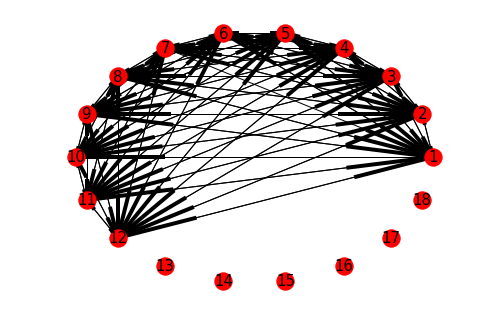

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


G = nx.from_numpy_matrix(np.array(H), create_using=nx.MultiDiGraph())
pos = nx.circular_layout(G)
nx.draw_circular(G)
labels = {i : i + 1 for i in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=15)
plt.show()

References:

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.argsort.html

https://github.com/pschragger/big-data-python-class/blob/master/Lectures/Lecture_7_-_Link_Analysis.ipynb

https://doc.scrapy.org/en/latest/intro/tutorial.html

https://stackoverflow.com/questions/18903197/scrapy-xpath-all-the-links-on-the-page

https://doc.scrapy.org/en/latest/intro/tutorial.html#creating-a-project
    
https://www.data-blogger.com/2016/08/18/scraping-a-website-with-python-scrapy/

https://networkx.github.io/documentation/networkx-1.10/reference/introduction.html



Source:insightfulmonkeys.blogspot.com